In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [5]:
# Load model
model = tf.keras.models.load_model('./models/object_detection.h5')
print('model loaded sucessfully')

model loaded sucessfully


In [9]:
path = './test_image/N53.jpeg'
image = load_img(path) # PIL object
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0 # convert into array and get the normalized output

In [10]:
# size of the orginal image
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)

Height of the image = 336
Width of the image = 642


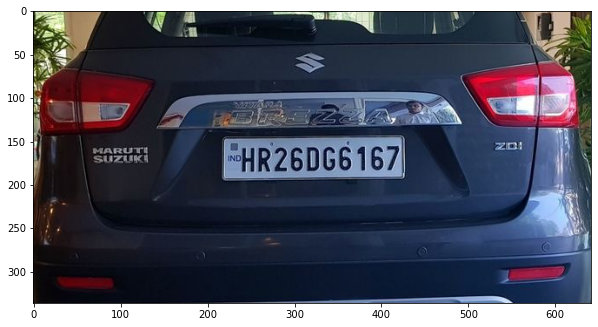

In [13]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [15]:
image_arr_224.shape

(224, 224, 3)

In [16]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [17]:
#make_prediction
coords = model.predict(test_arr)
coords

1/1 [==============================] - 5s 5s/step


array([[0.33480558, 0.66877383, 0.4403713 , 0.5545991 ]], dtype=float32)

In [18]:
#denormalization of output
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[214.94518107, 429.35279882, 147.9647584 , 186.34529972]])

In [19]:
coords = coords.astype(np.int32)
coords

array([[214, 429, 147, 186]])

(214, 147) (429, 186)


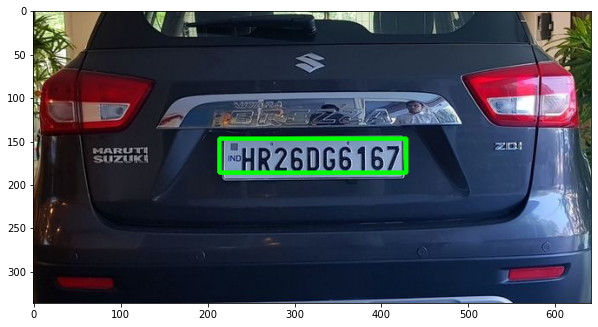

In [23]:
#bounding box
xmin,xmax,ymin,ymax = coords[0]
pt1 = (xmin,ymin)
pt2 = (xmax,ymax)
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [38]:
# create pipeline
path = './test_image/N53.jpeg'
def object_detection(path):
    
    #read image
    image = load_img(path) # PIL object
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    
    #data preprocessing
    image_arr_224 = img_to_array(image1)/255.0 # convert into array and get the normalized output

    h,w,d = image.shape

    test_arr = image_arr_224.reshape(1,224,224,3)

    #make_prediction
    coords = model.predict(test_arr)
    coords

    #denormalization of output
    denorm = np.array([w,w,h,h])
    coords = coords * denorm

    coords = coords.astype(np.int32)

    #bounding box
    xmin,xmax,ymin,ymax = coords[0]
    pt1 = (xmin,ymin)
    pt2 = (xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)

    return image,coords

1/1 [==============================] - 0s 234ms/step
(225, 261) (410, 324)


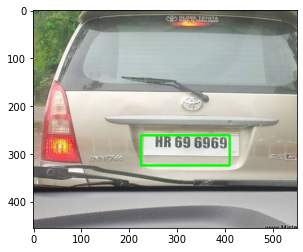

In [39]:
image, cods = object_detection('./test_image/N52.jpeg')

plt.figure()
plt.imshow( image)
plt.show()